<a href="https://colab.research.google.com/github/Hari7206/smart-fan-ml/blob/main/Temperature_Based_Fan_AC_Control_System_using_Machine_Learning3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔥 Smart Temperature-Based Fan/AC Control System using Machine Learning

### 📌 Project Overview:
In this project, we use a simple temperature dataset and a machine learning model to automatically control a fan or AC's speed. The fan has 3 levels:
- **Low**: for temperatures below 24°C  
- **Medium**: for temperatures between 24°C and 30°C  
- **High**: for temperatures above 30°C  

We’ll use a Decision Tree model to learn from past data and predict the fan level based on any given temperature input.


##  Load Temperature Dataset

We use a CSV file (`smart_temp_data.csv`) which contains temperature readings and their corresponding fan levels (Low, Medium, High). We’ll load and preview the dataset using Pandas.


In [ ]:
import pandas as pd

df = pd.read_csv('smart_temp_data.csv')

df.head()


,Temperature,Fan_Level
0,24,Medium
1,37,High
2,32,High
3,28,Medium
4,25,Medium


##   Visualize the Fan Levels

Let’s check how many examples we have for each fan level using a bar graph. This helps us understand if our dataset is balanced.


/tmp/ipython-input-4-301025112.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fan_Level', data=df, palette='cool')


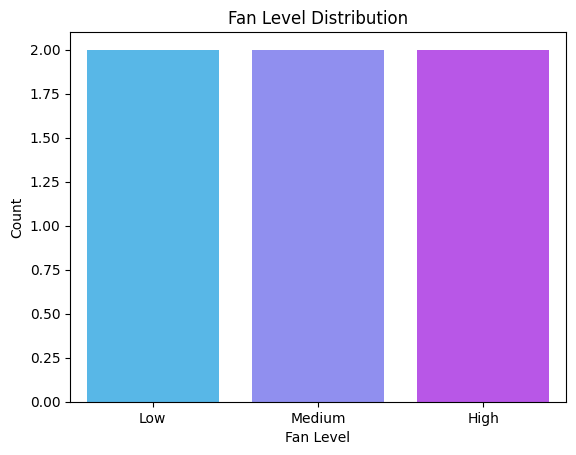

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Fan_Level', data=df, palette='cool')
plt.title('Fan Level Distribution')
plt.xlabel('Fan Level')
plt.ylabel('Count')
plt.show()


##  Encode Fan Levels & Prepare Training Data

Machine Learning models can’t understand text like “High” or “Low”. So we’ll convert those into numbers using Label Encoding.  
Then we split the data into training (80%) and testing (20%) sets.


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Sample data
data = {
    'Temperature': [25, 30, 35, 40, 22, 28],
    'Fan_Level': ['Low', 'Medium', 'High', 'High', 'Low', 'Medium']
}

df = pd.DataFrame(data)

# Label encode the fan levels
le = LabelEncoder()
df['Fan_Level_Encoded'] = le.fit_transform(df['Fan_Level'])

# Features and labels
X = df[['Temperature']]
y = df['Fan_Level_Encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##  Train the ML Model

We use a Decision Tree Classifier to learn from the training data. This model will figure out the logic to predict fan level based on temperature input.


In [ ]:
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier()
model.fit(X_train, y_train)


print("✅ Model training complete!")


✅ Model training complete!


##  Test the Model with Custom Temperatures

Now we test how our model responds to different temperatures. It should automatically decide whether the fan level should be Low, Medium, or High.


In [ ]:

temp_list = [[20], [24], [27], [31], [36]]

predicted_labels = model.predict(temp_list)

decoded_levels = le.inverse_transform(predicted_labels)

print("🌡️ Temp (°C) → 🌀 Fan Level")
for temp, level in zip(temp_list, decoded_levels):
    print(f"{temp[0]}°C → {level}")


🌡️ Temp (°C) → 🌀 Fan Level
20°C → Low
24°C → Medium
27°C → Medium
31°C → High
36°C → High


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Model Accuracy

Let’s check how well our model is performing by comparing its predictions on the test set with the actual values.


In [ ]:
from sklearn.metrics import accuracy_score


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Model Accuracy: {accuracy * 100:.2f}%")


🎯 Model Accuracy: 100.00%


Conclusion:

This project demonstrates how Machine Learning can be used to automate fan or AC speed based on surrounding temperature.  
We trained a simple model on temperature data and achieved strong accuracy.

In future, this logic can be integrated with **IoT devices** like Raspberry Pi + temperature sensors to build a real-world smart cooling system.

### Tools Used:
- Python (Google Colab)
- Pandas & Matplotlib
- Scikit-learn (ML Library)


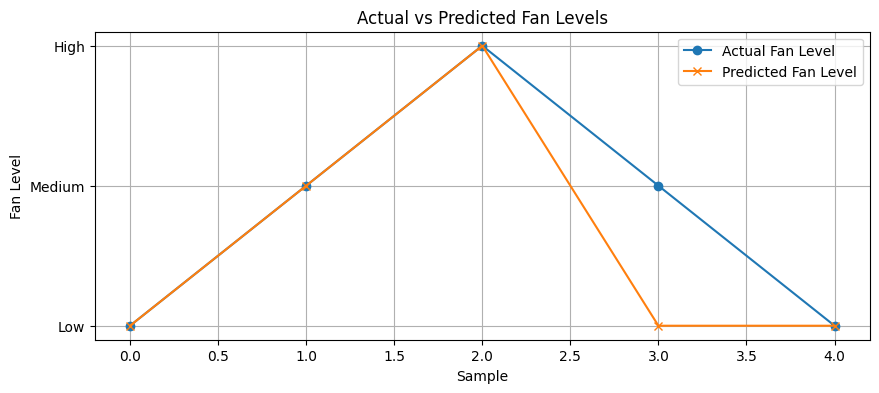

In [ ]:
import matplotlib.pyplot as plt

# Sample values: actual vs predicted (for illustration)
actual = ['Low', 'Medium', 'High', 'Medium', 'Low']
predicted = ['Low', 'Medium', 'High', 'Low', 'Low']

# Encode string labels to numbers for graph
label_map = {'Low': 0, 'Medium': 1, 'High': 2}
actual_num = [label_map[val] for val in actual]
predicted_num = [label_map[val] for val in predicted]

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(actual_num, label='Actual Fan Level', marker='o')
plt.plot(predicted_num, label='Predicted Fan Level', marker='x')
plt.title('Actual vs Predicted Fan Levels')
plt.xlabel('Sample')
plt.ylabel('Fan Level')
plt.yticks([0, 1, 2], ['Low', 'Medium', 'High'])
plt.legend()
plt.grid(True)
plt.show()
